In [11]:
using DifferentialEquations
using Plots

In [12]:
function robertson(dydt, y, p, t)
  y₁, y₂, y₃ = y
  k₁, k₂, k₃ = p
  dydt[1] = -k₁*y₁ + k₃*y₂*y₃
  dydt[2] =  k₁*y₁ - k₂*y₂^2 - k₃*y₂*y₃
  dydt[3] =  y₁ + y₂ + y₃ - 1
  return
end

M = [1. 0  0
     0  1. 0
     0  0  0]

robertson_odefun = ODEFunction(robertson, mass_matrix=M)

(::ODEFunction{true,typeof(robertson),Array{Float64,2},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing}) (generic function with 7 methods)

In [13]:
y₀ = [1.0, 0.0, 0.0]
tspan = (0.0, 1e5)
p = (0.04, 3e7, 1e4)
problem = ODEProblem(robertson_odefun, y₀, tspan, p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100000.0)
u0: [1.0, 0.0, 0.0]

In [14]:
solution = solve(problem, Rodas5(), reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: 3rd order Hermite
t: 186-element Array{Float64,1}:
      0.0                   
      1.0e-6                
      1.1e-5                
      9.052958728094971e-5  
      0.00022639917194929742
      0.00036893118460442644
      0.0005482536188262184 
      0.000744831985660109  
      0.0009837671296353187 
      0.001266970804675054  
      0.001679168326141648  
      0.0021012469095168036 
      0.0025796820454473267 
      ⋮                     
  46675.017971099536        
  50104.479500509966        
  53807.70021772048         
  57808.87290984382         
  62134.56824115649         
  66813.9959611255          
  71879.3060179558          
  77365.91781517459         
  83312.84438869369         
  89763.14603371375         
  96764.3668779674          
 100000.0                   
u: 186-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]                                                   
 [0.9999999600000008, 3.999998320000818e-8, 1.6058266

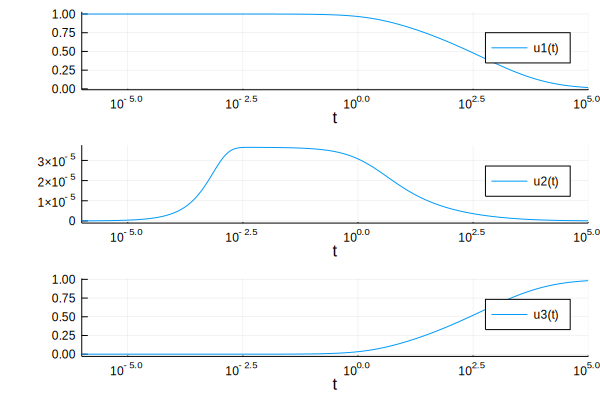

In [15]:
plot(solution, xscale=:log10, tspan=(1e-6, 1e5), layout=(3, 1))